In [7]:
# CT upload CSV File locally. Note renamed csv file
from google.colab import files
uploaded = files.upload()

In [6]:
#CT importing libaries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# CT reading in dataset
# data = pd.read_csv(list(uploaded.keys())[0])
df = pd.read_csv('UCI_heart_disease.csv')
df.head()
data=df

# CT display first few rows of dataset
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **EDA and Data Preprocessing**
**List of EDA analysis applied is given below**


In [2]:
# CT summary of stats of dataset
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [3]:
# CT checking data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [11]:
# CT number of features that have na values
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

<Axes: >

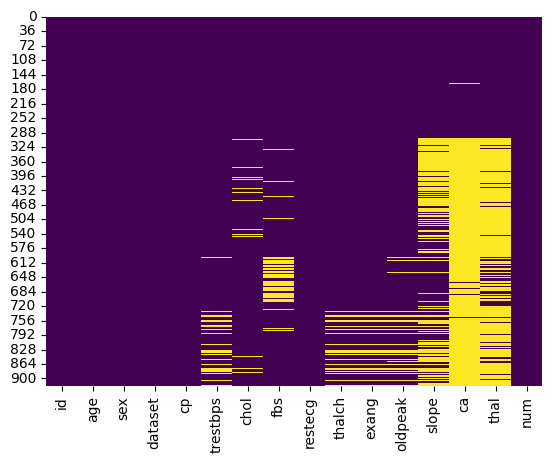

In [7]:
#CT  visualization of null values
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

In [13]:
data.dataset.value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [14]:
# CT how many of each class is there
data.num.value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

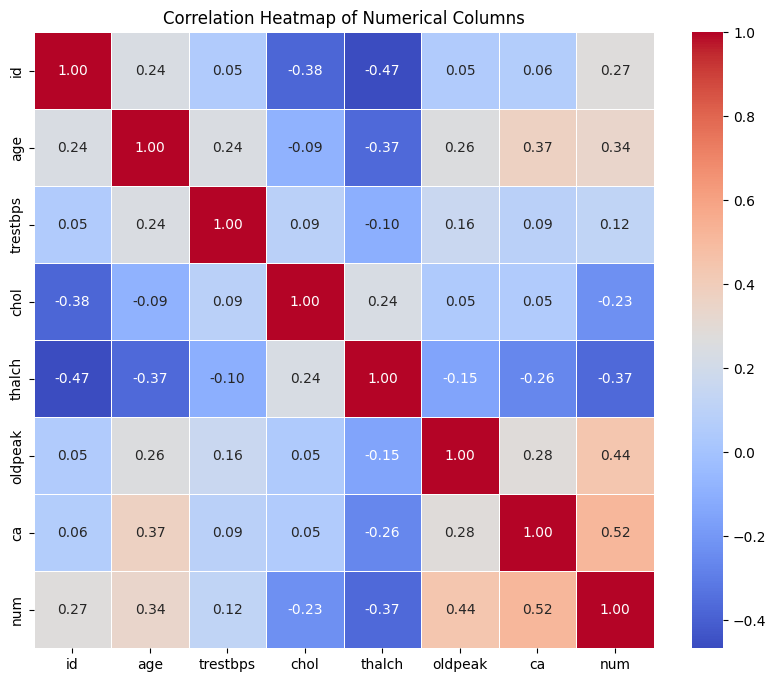

In [9]:
# CT visualize correlations
# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# Create a subset DataFrame with only numerical columns
numerical_data = data[numerical_columns]
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# Set the title of the plot
plt.title("Correlation Heatmap of Numerical Columns")
# Show the plot
plt.show()

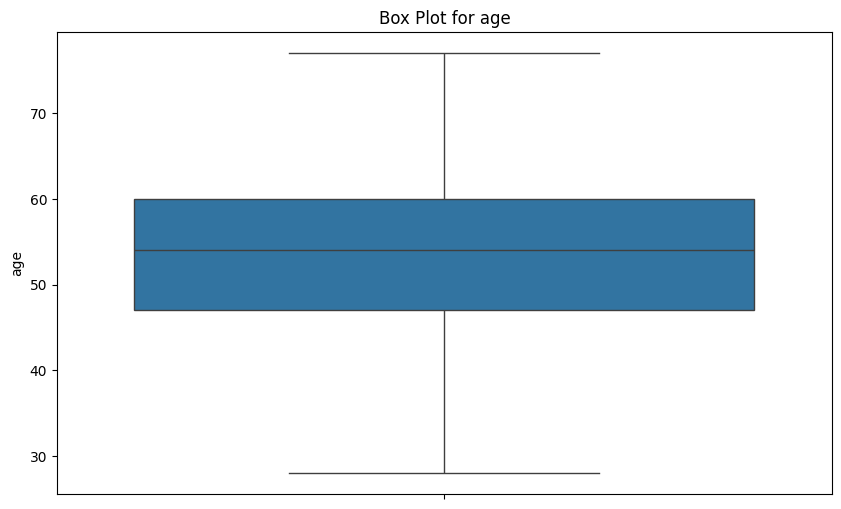

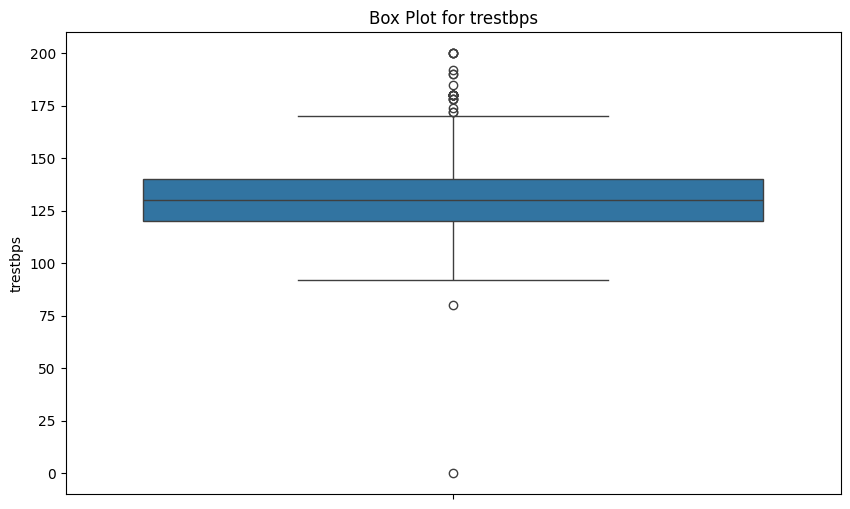

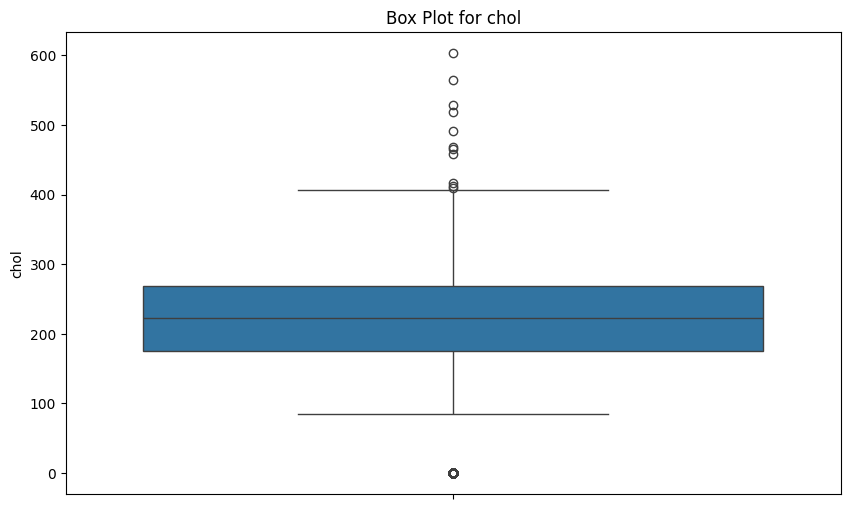

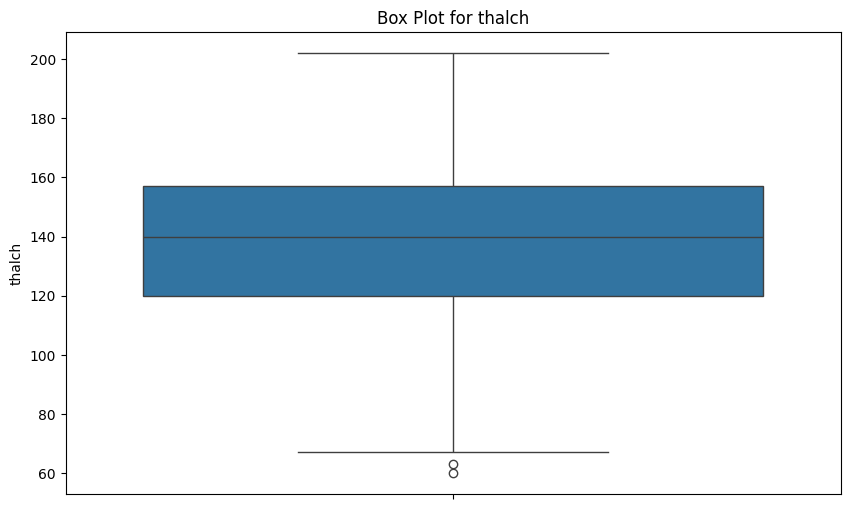

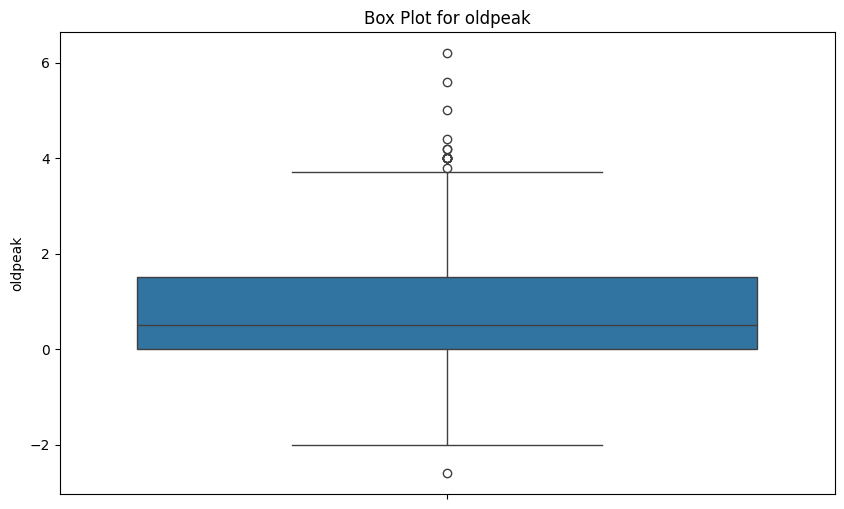

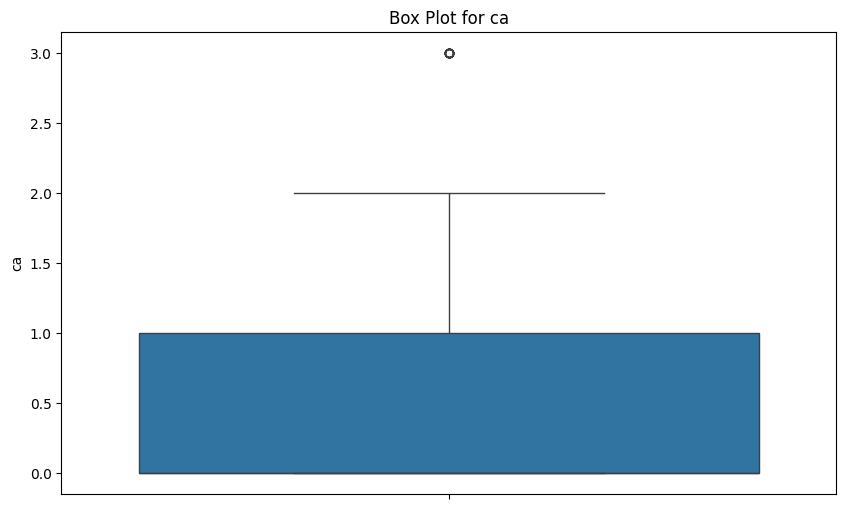

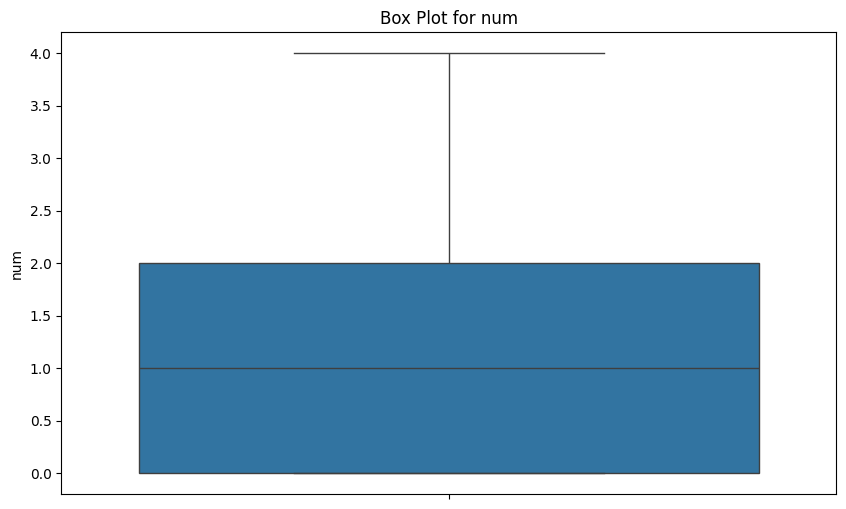

In [16]:
# CT checking for outliers w/ box plots

# List of continuous and ordinal columns
columns_to_plot = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Loop through the columns and plot box plots
for col in columns_to_plot:
    plt.figure(figsize=(10,6))
    sns.boxplot(data[col])
    plt.title(f'Box Plot for {col}')
    plt.show()


In [17]:
# CT cross-tabulation process for all combinations of categorical columms
# List of categorical columns
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Loop through each combination of two columns
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        print(f"Cross-tabulation between '{col1}' and '{col2}':")
        print(pd.crosstab(data[col1], data[col2]))
        print("\n" + "-"*50 + "\n")


Cross-tabulation between 'sex' and 'dataset':
dataset  Cleveland  Hungary  Switzerland  VA Long Beach
sex                                                    
Female          97       81           10              6
Male           207      212          113            194

--------------------------------------------------

Cross-tabulation between 'sex' and 'cp':
cp      asymptomatic  atypical angina  non-anginal  typical angina
sex                                                               
Female            70               61           53              10
Male             426              113          151              36

--------------------------------------------------

Cross-tabulation between 'sex' and 'fbs':
fbs     False  True 
sex                 
Female    164     19
Male      528    119

--------------------------------------------------

Cross-tabulation between 'sex' and 'restecg':
restecg  lv hypertrophy  normal  st-t abnormality
sex                                     

**Calculate percentage of missing values**

In [18]:
# Calculate percentage of missing values
missing_pct = df.isnull().sum() / len(df) * 100

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate and print missing value percentages for numerical columns
print("Numerical Columns - Missing Value Percentages:")
for col in numerical_cols:
    pct = missing_pct[col]
    print(f"{col}: {pct:.2f}%")

# Calculate and print missing value percentages for categorical columns
print("\nCategorical Columns - Missing Value Percentages:")
for col in categorical_cols:
    pct = missing_pct[col]
    print(f"{col}: {pct:.2f}%")

# Identify columns with >30% missing values
high_missing_cols = [col for col, pct in missing_pct.items() if pct > 30]

# Print columns with >30% missing values
print("\nColumns with >30% Missing Values:", high_missing_cols)

Numerical Columns - Missing Value Percentages:
id: 0.00%
age: 0.00%
trestbps: 6.41%
chol: 3.26%
thalch: 5.98%
oldpeak: 6.74%
ca: 66.41%
num: 0.00%

Categorical Columns - Missing Value Percentages:
sex: 0.00%
dataset: 0.00%
cp: 0.00%
fbs: 9.78%
restecg: 0.22%
exang: 5.98%
slope: 33.59%
thal: 52.83%

Columns with >30% Missing Values: ['slope', 'ca', 'thal']


**Visualize outliers in numeric features**

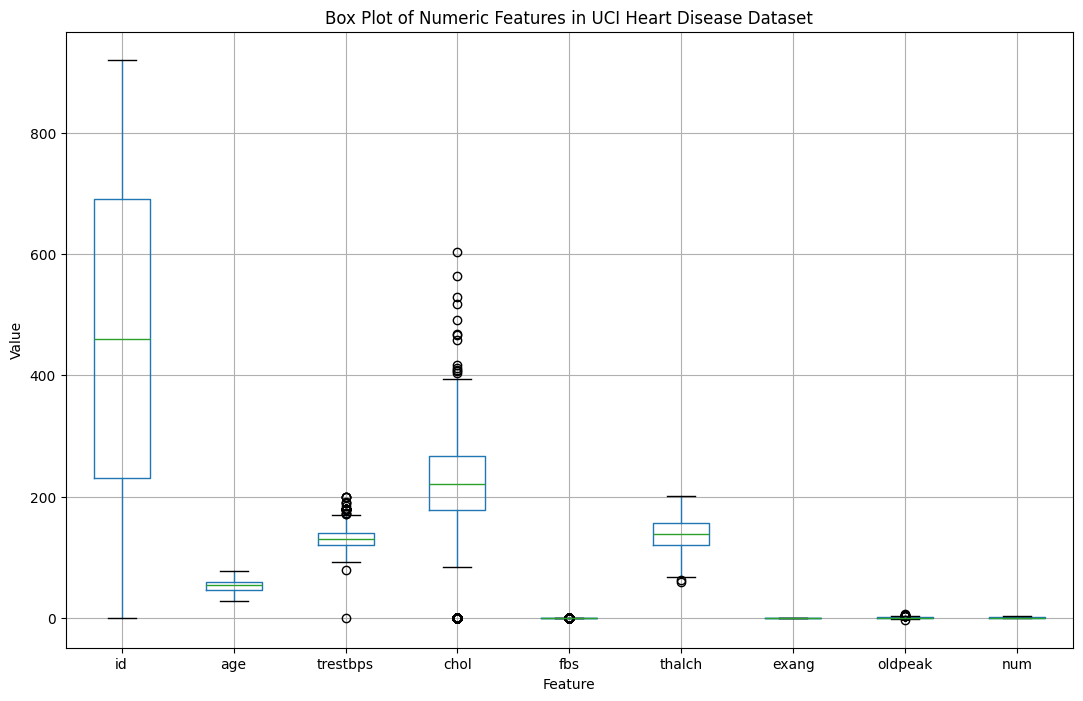

Number of outliers detected using IQR method for age: 0
Number of outliers detected using IQR method for trestbps: 28
Number of outliers detected using IQR method for chol: 185
Number of outliers detected using IQR method for thalch: 2
Number of outliers detected using IQR method for oldpeak: 16


In [22]:
# Visualize the outliers in numeric features using box plots
fig, ax = plt.subplots(figsize=(13,8))
df.boxplot(ax=ax)
ax.set_xlabel('Feature')
ax.set_ylabel('Value')
ax.set_title('Box Plot of Numeric Features in UCI Heart Disease Dataset')
plt.show()

# IQR Analysis
numeric_col = df.select_dtypes(include=['number'])
numeric_col = numeric_col.drop(['num', 'id'], axis=1)
# Identify outliers in numeric features
for col in numeric_col:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    print(f'Number of outliers detected using IQR method for {col}: {len(outliers)}')

**Dealing with outliers : Replacing them with means**

In [23]:
for col in numeric_col:
    # Calculate the IQR (Interquartile Range)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    # Replace outliers with mean value
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mean(), df[col])

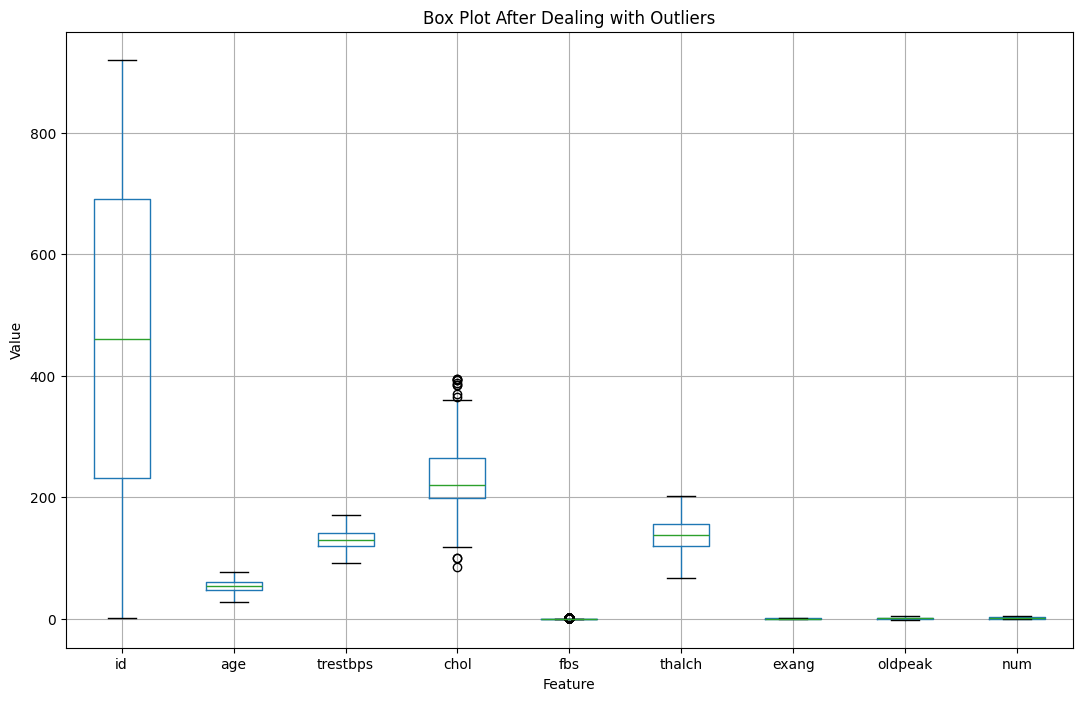

In [24]:
# Box plots affter dealing with outliers
fig, ax = plt.subplots(figsize=(13,8))
df.boxplot(ax=ax)
ax.set_xlabel('Feature')
ax.set_ylabel('Value')
ax.set_title('Box Plot After Dealing with Outliers')
plt.show()


# **Multiclass Classifiers modeling, hyperparameter tuning and model evaluation**

In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier, LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA


import warnings
# Ignore warnings
warnings.filterwarnings("ignore")
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numeric_columns = data.select_dtypes(exclude=['object']).columns.tolist()

# Make a copy of the data to avoid changing the original dataframe
data_encoded = data.copy()
# Assuming 'data' is your DataFrame and 'num' is the target column
# Encoding categorical variables
le = LabelEncoder()
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for column in categorical_columns:
    data_encoded[column] = le.fit_transform(data_encoded[column])

 #Now we separate the data into numeric and categorical for imputation
data_numeric = data_encoded[numeric_columns]
data_categorical = data_encoded[categorical_columns]

# Apply imputation only to numeric columns
imputer = SimpleImputer(strategy='mean')
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=numeric_columns)

# Combine the numeric and categorical data back into one dataframe
data_imputed = pd.concat([data_numeric_imputed, data_categorical], axis=1)


# Splitting the dataset
X = data_imputed.drop('num', axis=1)
# X = data_imputed.drop(['num', 'id'],axis=1)
y = data_imputed['num']



# Initialize the PCA with the desired number of components (adjust as needed)
num_components = 2  # You can adjust this value based on your requirements
pca = PCA(n_components=num_components)

# Fit and transform your data using PCA
X_pca = pca.fit_transform(X)

# Initialize the StandardScaler
# scaler = StandardScaler()
scaler = MinMaxScaler()
# scaler = RobustScaler()

# Fit and transform your data using StandardScaler
X_scaled = scaler.fit_transform(X)
# X_scaled = scaler.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform oversampling using SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)



# Define classifiers and their hyperparameter grids
classifiers = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 2, 4, 6, 8, 10, 12], 'min_samples_split': [2, 5, 10, 15], 'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': [1, 2, 4]}),
    'DecisionTree': (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 2, 4, 6, 8, 10, 12], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4]}),
    # 'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4], 'multi_class': ['ovr']}),
    # 'LinearSVC': (LinearSVC(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'multi_class': ['ovr']}),
    # 'NuSVC': (NuSVC(), {'nu': [0.1, 0.5, 0.9], 'kernel': ['linear', 'rbf'], 'multi_class': ['ovr']}),
    # 'LogisticRegression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs'], 'multi_class': ['ovr']}),
    'LinearDiscriminantAnalysis': (LinearDiscriminantAnalysis(), {'solver': ['svd', 'lsqr', 'eigen']}),
    'RidgeClassifierCV': (RidgeClassifierCV(), {'alphas': [(0.1, 1.0, 10.0)]}),
    'RidgeClassifier': (RidgeClassifier(), {'alpha': [0.1, 1.0, 10.0]}),
    # 'LinearSVC': (LinearSVC(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'multi_class': ['ovr']}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs'], 'multi_class': ['ovr']}),
    # 'NuSVC': (NuSVC(), {'nu': [0.1, 0.5, 0.9], 'kernel': ['linear', 'rbf'], 'multi_class': ['ovr']}),
    # 'SVC': (SVC(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf'], 'multi_class': ['ovr']}),
    'CalibratedClassifierCV': (CalibratedClassifierCV(), {'method': ['sigmoid', 'isotonic']}),
    'ExtraTreesClassifier': (ExtraTreesClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'BaggingClassifier': (BaggingClassifier(), {'n_estimators': [10, 50, 100]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    # 'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    # 'XGBClassifier': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'Perceptron': (Perceptron(), {'alpha': [0.0001, 0.001, 0.01]}),
    'PassiveAggressiveClassifier': (PassiveAggressiveClassifier(), {'C': [0.001, 0.01, 0.1]})
}




# Hyperparameter tuning for each classifier
results = []
for clf_name, (clf, param_grid) in classifiers.items():
    print(f'Tuning hyperparameters for {clf_name}...')

    # Randomized Search
    random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=72, cv=5, verbose=2, random_state=42, n_jobs=-1)
    random_search.fit(X_train_sm, y_train_sm)

    # Best model evaluation
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

    # Save results
    results.append({
        'Classifier': clf_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        # 'AUC': auc,
        'Best Hyperparameters': random_search.best_params_
    })

# Display results
results_df = pd.DataFrame(results)
# print(results_df)



# Sort the DataFrame based on Accuracy in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)

from tabulate import tabulate
# Display the results using tabulate
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))

Tuning hyperparameters for RandomForest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tuning hyperparameters for DecisionTree...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tuning hyperparameters for LinearDiscriminantAnalysis...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuning hyperparameters for RidgeClassifierCV...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuning hyperparameters for RidgeClassifier...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuning hyperparameters for LogisticRegression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning hyperparameters for CalibratedClassifierCV...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Tuning hyperparameters for ExtraTreesClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning hyperparameters for BaggingClassifier...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuning hyperparame

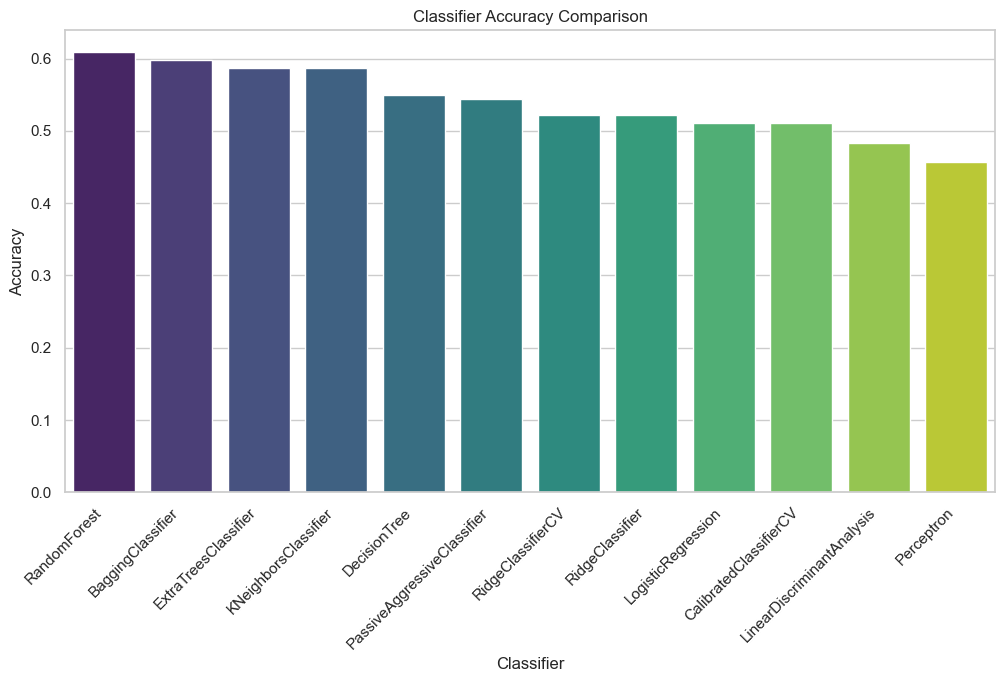

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")

# Assuming you have the results_df DataFrame with performance metrics
# (including Accuracy, Precision, Recall, F1 Score, AUC, and Classifier columns)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar chart for Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x="Classifier", y="Accuracy", data=results_df, palette="viridis")
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()


# **Converting it into Binary Classification Problem**

**Data Preprocessing for binary classifiaction**

In [29]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
%matplotlib inline
df = data

# Dropping rows containing missing data
df.dropna(inplace = True)
df = shuffle(df)
df.info()

#Converting the 'num' column into a binary catagory
df['num'] = ((df['num'] > 0)*1).copy()

#Encoding Categorical Features
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# df['species']= label_encoder.fit_transform(df['species'])
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


# Normalizing the dataset
X=df.drop(['num', 'id'],axis=1) # Independent Features i,e Parameters
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = df['num']  # Target Feature (Dependent Feature)

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 151 to 150
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    bool   
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    bool   
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 35.6+ KB


**Comparing various ML Models using LazyPredict**

**Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning. We have choosen top 15 models from lazypredict and applied further hyperparameter tuning**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from lazypredict.Supervised import LazyClassifier
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Instantiate the LazyClassifier and fit the training data
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their accuracy scores
print(predictions)

# **Binary Classifiers modeling, hyperparameter tuning and model evaluation**

Performing hyperparameter tuning for LinearDiscriminantAnalysis...
Performing hyperparameter tuning for RidgeClassifierCV...
Performing hyperparameter tuning for RidgeClassifier...
Performing hyperparameter tuning for LinearSVC...
Performing hyperparameter tuning for LogisticRegression...
Performing hyperparameter tuning for NuSVC...
Performing hyperparameter tuning for SVC...
Performing hyperparameter tuning for CalibratedClassifierCV...
Performing hyperparameter tuning for ExtraTreesClassifier...
Performing hyperparameter tuning for BaggingClassifier...
Performing hyperparameter tuning for KNeighborsClassifier...
Performing hyperparameter tuning for RandomForestClassifier...
Performing hyperparameter tuning for XGBClassifier...
Performing hyperparameter tuning for Perceptron...
Performing hyperparameter tuning for PassiveAggressiveClassifier...


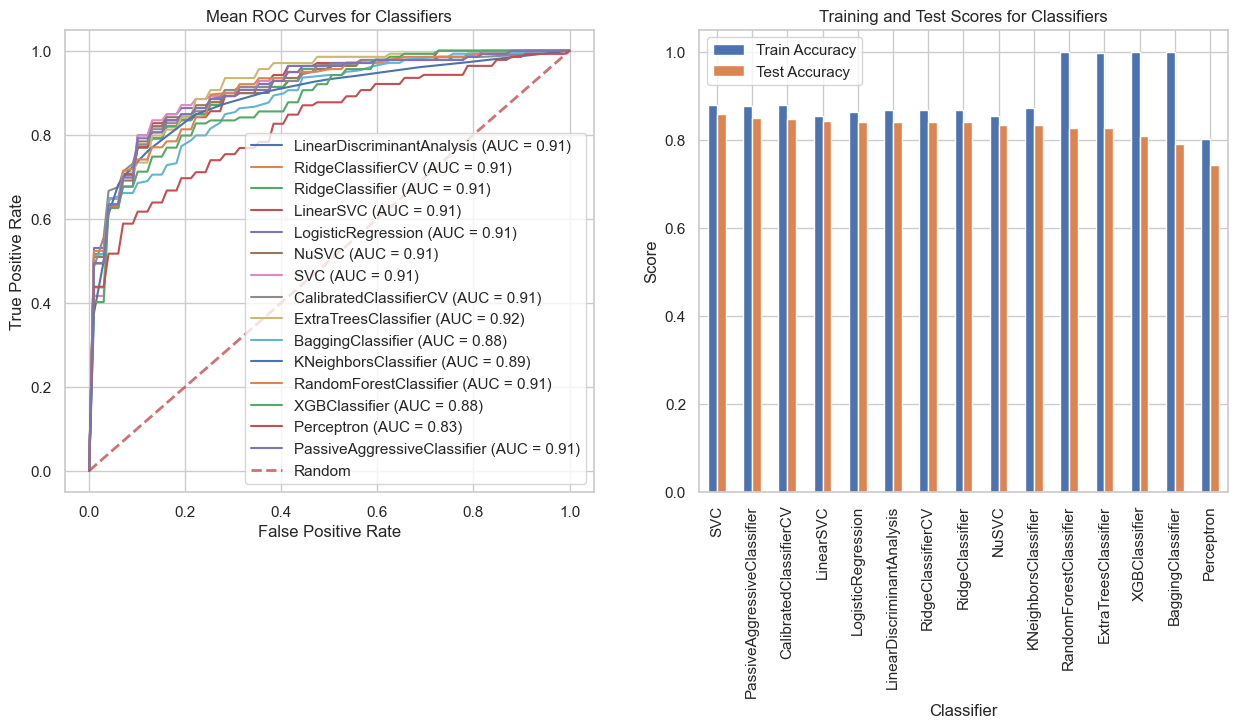

╒════╤═════════════════════════════╤═════════════════════════════════════════════╤══════════════════╤═════════════════╤════════════════╤══════════════════╤═══════════════╤═════════════════╕
│    │ Classifier                  │ Best Params                                 │   Train Accuracy │   Test Accuracy │   Mean ROC AUC │   Mean Precision │   Mean Recall │   Mean F1 Score │
╞════╪═════════════════════════════╪═════════════════════════════════════════════╪══════════════════╪═════════════════╪════════════════╪══════════════════╪═══════════════╪═════════════════╡
│  6 │ SVC                         │ {'C': 10.0, 'kernel': 'linear'}             │         0.877925 │        0.859492 │       0.911293 │         0.889225 │      0.80582  │        0.841714 │
├────┼─────────────────────────────┼─────────────────────────────────────────────┼──────────────────┼─────────────────┼────────────────┼──────────────────┼───────────────┼─────────────────┤
│ 14 │ PassiveAggressiveClassifier │ {'C': 0.01}  

In [30]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from scipy import interp
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier, LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

# Ignore warnings
warnings.filterwarnings("ignore")



# Define classifiers and their hyperparameter grids
classifiers = {
    'LinearDiscriminantAnalysis': (LinearDiscriminantAnalysis(), {'solver': ['svd', 'lsqr', 'eigen']}),
    'RidgeClassifierCV': (RidgeClassifierCV(), {'alphas': [(0.1, 1.0, 10.0)]}),
    'RidgeClassifier': (RidgeClassifier(), {'alpha': [0.1, 1.0, 10.0]}),
    'LinearSVC': (LinearSVC(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs']}),
    'NuSVC': (NuSVC(), {'nu': [0.1, 0.5, 0.9], 'kernel': ['linear', 'rbf']}),
    'SVC': (SVC(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
    'CalibratedClassifierCV': (CalibratedClassifierCV(), {'method': ['sigmoid', 'isotonic']}),
    'ExtraTreesClassifier': (ExtraTreesClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'BaggingClassifier': (BaggingClassifier(), {'n_estimators': [10, 50, 100]}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'XGBClassifier': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'Perceptron': (Perceptron(), {'alpha': [0.0001, 0.001, 0.01]}),
    'PassiveAggressiveClassifier': (PassiveAggressiveClassifier(), {'C': [0.001, 0.01, 0.1]})
}


# Create an empty list to store results
results_list = []

# Create mean_fpr
mean_fpr = np.linspace(0, 1, 100)

# Initialize subplots for ROC curves and accuracies
fig, (ax_roc, ax_acc) = plt.subplots(1, 2, figsize=(15, 6))

# Perform hyperparameter tuning and 5-fold cross-validation
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Performing hyperparameter tuning for {clf_name}...")

    # Use StratifiedKFold for classification problems
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_scaled, y)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Perform 5-fold cross-validation with the best hyperparameters
    train_scores = []
    test_scores = []
    tprs = []
    aucs = []
    precisions = []
    recalls = []
    f1_scores = []

    for train_index, test_index in cv.split(X_scaled, y):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Retrain the model with the best hyperparameters
        best_model = grid_search.best_estimator_
        best_model.fit(X_train, y_train)

        # Training accuracy
        y_train_pred = best_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_scores.append(train_accuracy)

        # Test accuracy
        y_test_pred = best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_scores.append(test_accuracy)

        # Compute probability estimates and ROC curve
        if hasattr(best_model, 'predict_proba'):
            decision_values = best_model.predict_proba(X_test)[:, 1]
        elif hasattr(best_model, 'decision_function'):
            decision_values = best_model.decision_function(X_test)
        else:
            raise ValueError("The classifier doesn't support probability estimates or decision function.")

        fpr, tpr, _ = roc_curve(y_test, decision_values)
        roc_auc = auc(fpr, tpr)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

        # Compute precision, recall, and F1 score
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Plot individual ROC curve for each fold
    ax_roc.plot(mean_fpr, np.mean(tprs, axis=0), label=f'{clf_name} (AUC = {np.mean(aucs):.2f})')

    # Store the results in the list
    results_list.append({
        'Classifier': clf_name,
        'Best Params': best_params,
        'Train Accuracy': np.mean(train_scores),
        'Test Accuracy': np.mean(test_scores),
        'Mean ROC AUC': np.mean(aucs),
        'Mean Precision': np.mean(precisions),
        'Mean Recall': np.mean(recalls),
        'Mean F1 Score': np.mean(f1_scores)
    })

# Plot settings for ROC curves
ax_roc.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=0.8)
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Mean ROC Curves for Classifiers')
ax_roc.legend(loc='lower right')

# Plot settings for accuracies
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by='Test Accuracy', ascending=False)
results_df.plot(x='Classifier', y=['Train Accuracy', 'Test Accuracy'], kind='bar', ax=ax_acc)
ax_acc.set_ylabel('Score')
ax_acc.set_title('Training and Test Scores for Classifiers')

# Display the plot
plt.show()

# Display the results using tabulate
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))
